In [3]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [5]:
airbnb<-read.csv('airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [6]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [7]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

names(airbnb) = newnames
head(airbnb)



,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [8]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados*0.092903


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [10]:
levels(airbnb$CodigoPostal)

levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('')] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('-')] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('28')] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('Madrid 28004')] <- '28004'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('2804')] <- '28004'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('2805')] <- '28005'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('2815')] <- '28015'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('280013')] <- '28013'

levels(airbnb$CodigoPostal)[!startsWith(levels(airbnb$CodigoPostal), '28')] <- NA

z <- grepl("\n", levels(airbnb$CodigoPostal), fixed=TRUE)
levels(airbnb$CodigoPostal)[z] <- substr(levels(airbnb$CodigoPostal)[z],1,5)

levels(airbnb$CodigoPostal)



[1] "28001" "28013" "28002" "28003" "28004" "28005" "28006" "28007" "28008"
[10] "28009" "28010" "28011" "28012" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

[1] "28001" "28013" "28002" "28003" "28004" "28005" "28006" "28007" "28008"
[10] "28009" "28010" "28011" "28012" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [11]:
cat("Tabla con los Codigos postales: \n")
table(airbnb$CodigoPostal)

Tabla con los Codigos postales: 



28001 28013 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 
  231  1020   171   185  1796  1195   218   206   338   216   384   250  2060 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [12]:

cat("los 5 códigos postales con más entradas: \n")
sort(table(airbnb$CodigoPostal), decreasing=T)[1:5]

cat("los 5 códigos postales con menos entradas : \n")
sort(table(airbnb$CodigoPostal))[1:5]



los 5 códigos postales con más entradas: 



28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

los 5 códigos postales con menos entradas : 



28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [15]:
library(dplyr)
Codigoposta28012 <- airbnb %>% 
filter(CodigoPostal==28012) %>%
select (CodigoPostal,Barrio)
unique(Codigoposta28012)



,CodigoPostal,Barrio
,<fct>,<fct>
1,28012,Sol
5,28012,Acacias
10,28012,Palos de Moguer
11,28012,Embajadores
27,28012,Cortes
96,28012,Palacio
262,28012,Universidad
863,28012,Delicias
1435,28012,Arapiles


¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [19]:
cat("Para el Codigo postal 28012 hay los siguientes barrios:\n")

barrios_28012 <- airbnb[airbnb$CodigoPostal == '28012' & !is.na(airbnb$CodigoPostal),]
unique(barrios_28012['Barrio'])



Para el Codigo postal 28012 hay los siguientes barrios:


,Barrio
,<fct>
18,Sol
34,Acacias
72,Palos de Moguer
77,Embajadores
104,Cortes
987,Palacio
1716,Universidad
5075,Delicias
9295,Arapiles


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [21]:
Totalbarrio <-airbnb$Barrio %>% unique %>% length
cat(paste("En total hay ", Totalbarrio, " Barrios\n" ))
Totalbarrio

cat("Los barrios son los siguientes: \n")

ListaBarrio <-airbnb$Barrio %>% unique
ListaBarrio



En total hay  125  Barrios


[1] 125

Los barrios son los siguientes: 


[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [22]:
cat (" Los 5 Barrios con mayores entradas son: \n")
sort(table(select(airbnb,Barrio)),decreasing=T)[1:5]

cuenta <-sort(table(select(airbnb,Barrio)),decreasing=T)[1:5]



 Los 5 Barrios con mayores entradas son: 


Barrio
Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [23]:

numerotipos <-paste ("Hay ",airbnb$TipoAlquiler %>% unique() %>% length(), " Tipos de Alquileres")
cat(numerotipos,"\n")
cat("-----------------------------------------------------\n")
cat("Los tipo de Alquiler son :\n")
airbnb$TipoAlquiler %>% unique()



cat("-----------------------------------------------------\n")

cat("Entradas por cada tipo de Alquiler: \n")
table(select(airbnb,TipoAlquiler))

Hay  3  Tipos de Alquileres 
-----------------------------------------------------
Los tipo de Alquiler son :


[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

-----------------------------------------------------
Entradas por cada tipo de Alquiler: 


TipoAlquiler
Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

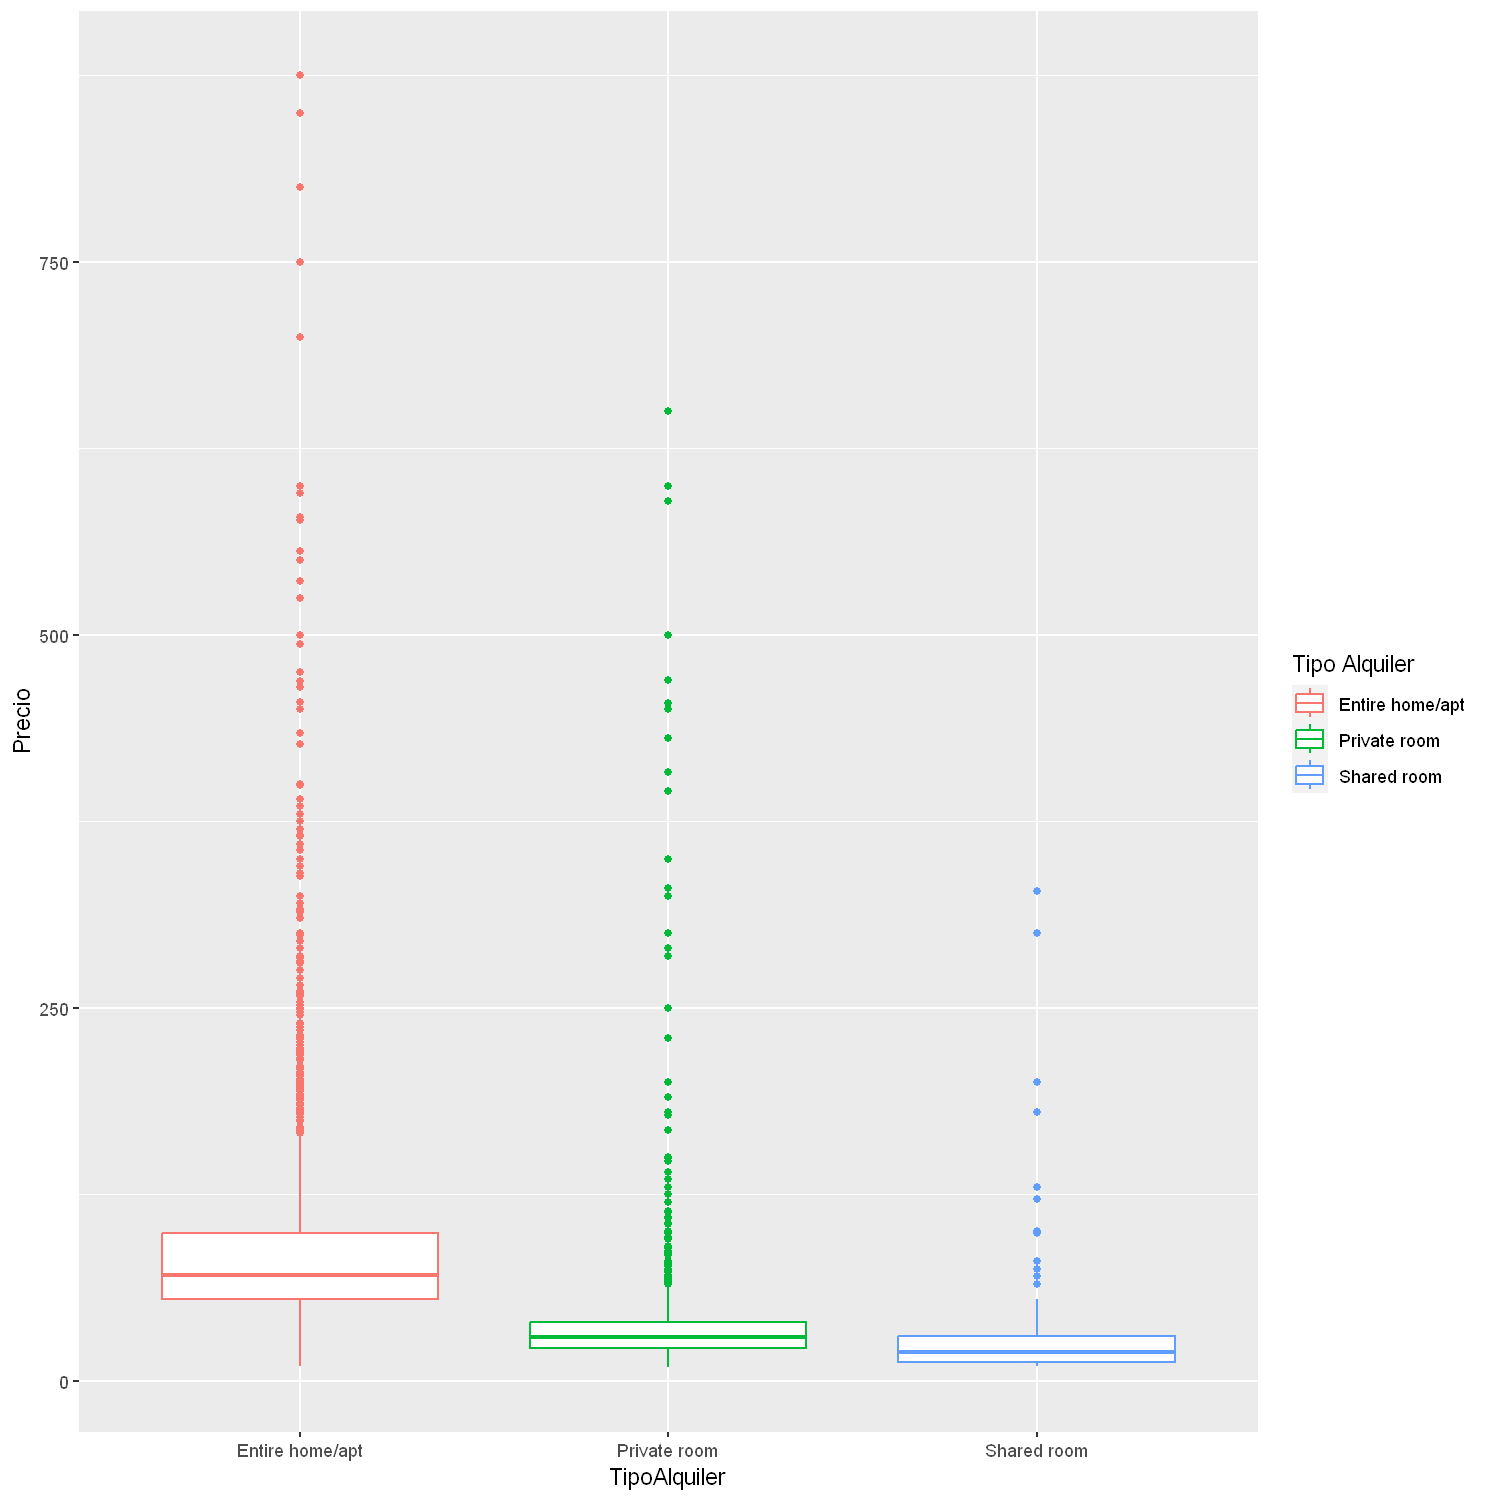

In [24]:
library("ggplot2")
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 150)

con_precio <- airbnb[!is.na(airbnb$Precio), ]
ggplot(data=con_precio, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
   geom_boxplot(na.rm = FALSE) +
   scale_color_discrete(name="Tipo Alquiler")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [25]:
promedios <- aggregate(Precio~TipoAlquiler, airbnb, mean, na.rm=TRUE)
promedios




cat("----------------------------------------------------------------------------------\n")
cat("Lo comprobaria con el  TEST Shapiro-Wilk para contrastar si el conjunto de datos siguen 
una distribución normal o no.\n")
cat("----------------------------------------------------------------------------------\n")
cat("-------------TEST DE SHAPIRO-WILK------------------------------------------------\n")


cat("Comprobacion  con shapiro test :\n")



shapiro.test(airbnb$Precio[airbnb$TipoAlquiler=='Shared room'])
shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt'], 5000))
shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=='Private room'],5000))


cat(" No sigue una distribucion normal por lo que usaremos Kruskal para comprobar los grupos :\n")
dfTipos <- rbind(data.frame(value=airbnb$Precio[airbnb$TipoAlquiler=='Shared room'],cl='Shared room'),data.frame(value=airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt'],cl='Entire home/apt'),data.frame(value=airbnb$Precio[airbnb$TipoAlquiler=='Private room'],cl='Private room'))

kruskal.test( value ~ cl, data=dfTipos)
cat("----------------------------------------------------------------------------------\n")
cat( "2,2e-16 como valor de p indicaría un resultado significativo,\n
lo que significa que el valor de p real es incluso menor que 2,2e-16\n")


TipoAlquiler,Precio
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


----------------------------------------------------------------------------------
Lo comprobaria con el  TEST Shapiro-Wilk para contrastar si el conjunto de datos siguen 
una distribución normal o no.
----------------------------------------------------------------------------------
-------------TEST DE SHAPIRO-WILK------------------------------------------------
Comprobacion  con shapiro test :



	Shapiro-Wilk normality test

data:  airbnb$Precio[airbnb$TipoAlquiler == "Shared room"]
W = 0.4436, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  head(airbnb$Precio[airbnb$TipoAlquiler == "Entire home/apt"], 5000)
W = 0.64959, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  head(airbnb$Precio[airbnb$TipoAlquiler == "Private room"], 5000)
W = 0.38267, p-value < 2.2e-16


 No sigue una distribucion normal por lo que usaremos Kruskal para comprobar los grupos :



	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


----------------------------------------------------------------------------------
2,2e-16 como valor de p indicaría un resultado significativo,

lo que significa que el valor de p real es incluso menor que 2,2e-16


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [26]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=="Entire home/apt",]
airbnb_entire 

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [27]:
cat("los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler: \n")
sort(table(select(airbnb_entire,Barrio)),decreasing=T)[1:5]


los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler: 


Barrio
Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [28]:
cat("los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son: \n")

PrecioBarrio <- aggregate(Precio ~ Barrio
    , airbnb_entire
    , mean
    , na.rm=TRUE)


PrecioBarrio[order(PrecioBarrio$Precio, decreasing=TRUE), ][1:5,]






los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros son: 


,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [29]:
 cat("Frecuencia de Apartamentos por barrios")


ApartamentosBarrio <- aggregate(CodigoPostal ~ Barrio
    , airbnb_entire
    , length)


colnames(ApartamentosBarrio)<-c('Barrio', 'Freq')


TotalBarrio <- merge(PrecioBarrio, ApartamentosBarrio)
TotalBarrio



Frecuencia de Apartamentos por barrios

Barrio,Precio,Freq
<fct>,<dbl>,<int>
Abrantes,46.00000,3
Acacias,68.16393,59
Adelfas,68.72727,32
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,4
Almagro,109.18557,93
Almenara,65.68000,23
Almendrales,77.50000,17


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [30]:
cat ("Los 5 barrios con mayor precio y más de 100 entradas de alquiler : \n")

BarriosOrdenados <- TotalBarrio[order(TotalBarrio$Precio, decreasing=TRUE), ]
BarriosOrdenados100 <- BarriosOrdenados[BarriosOrdenados$Freq > 100, ][1:5, ]

BarriosOrdenados100


Los 5 barrios con mayor precio y más de 100 entradas de alquiler : 


,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
92,Recoletos,161.92537,126
52,Goya,111.33803,137
105,Sol,100.75036,688
107,Trafalgar,98.57848,215
59,Justicia,98.25468,519


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
"Removed 1 rows containing non-finite values (`stat_density()`)."


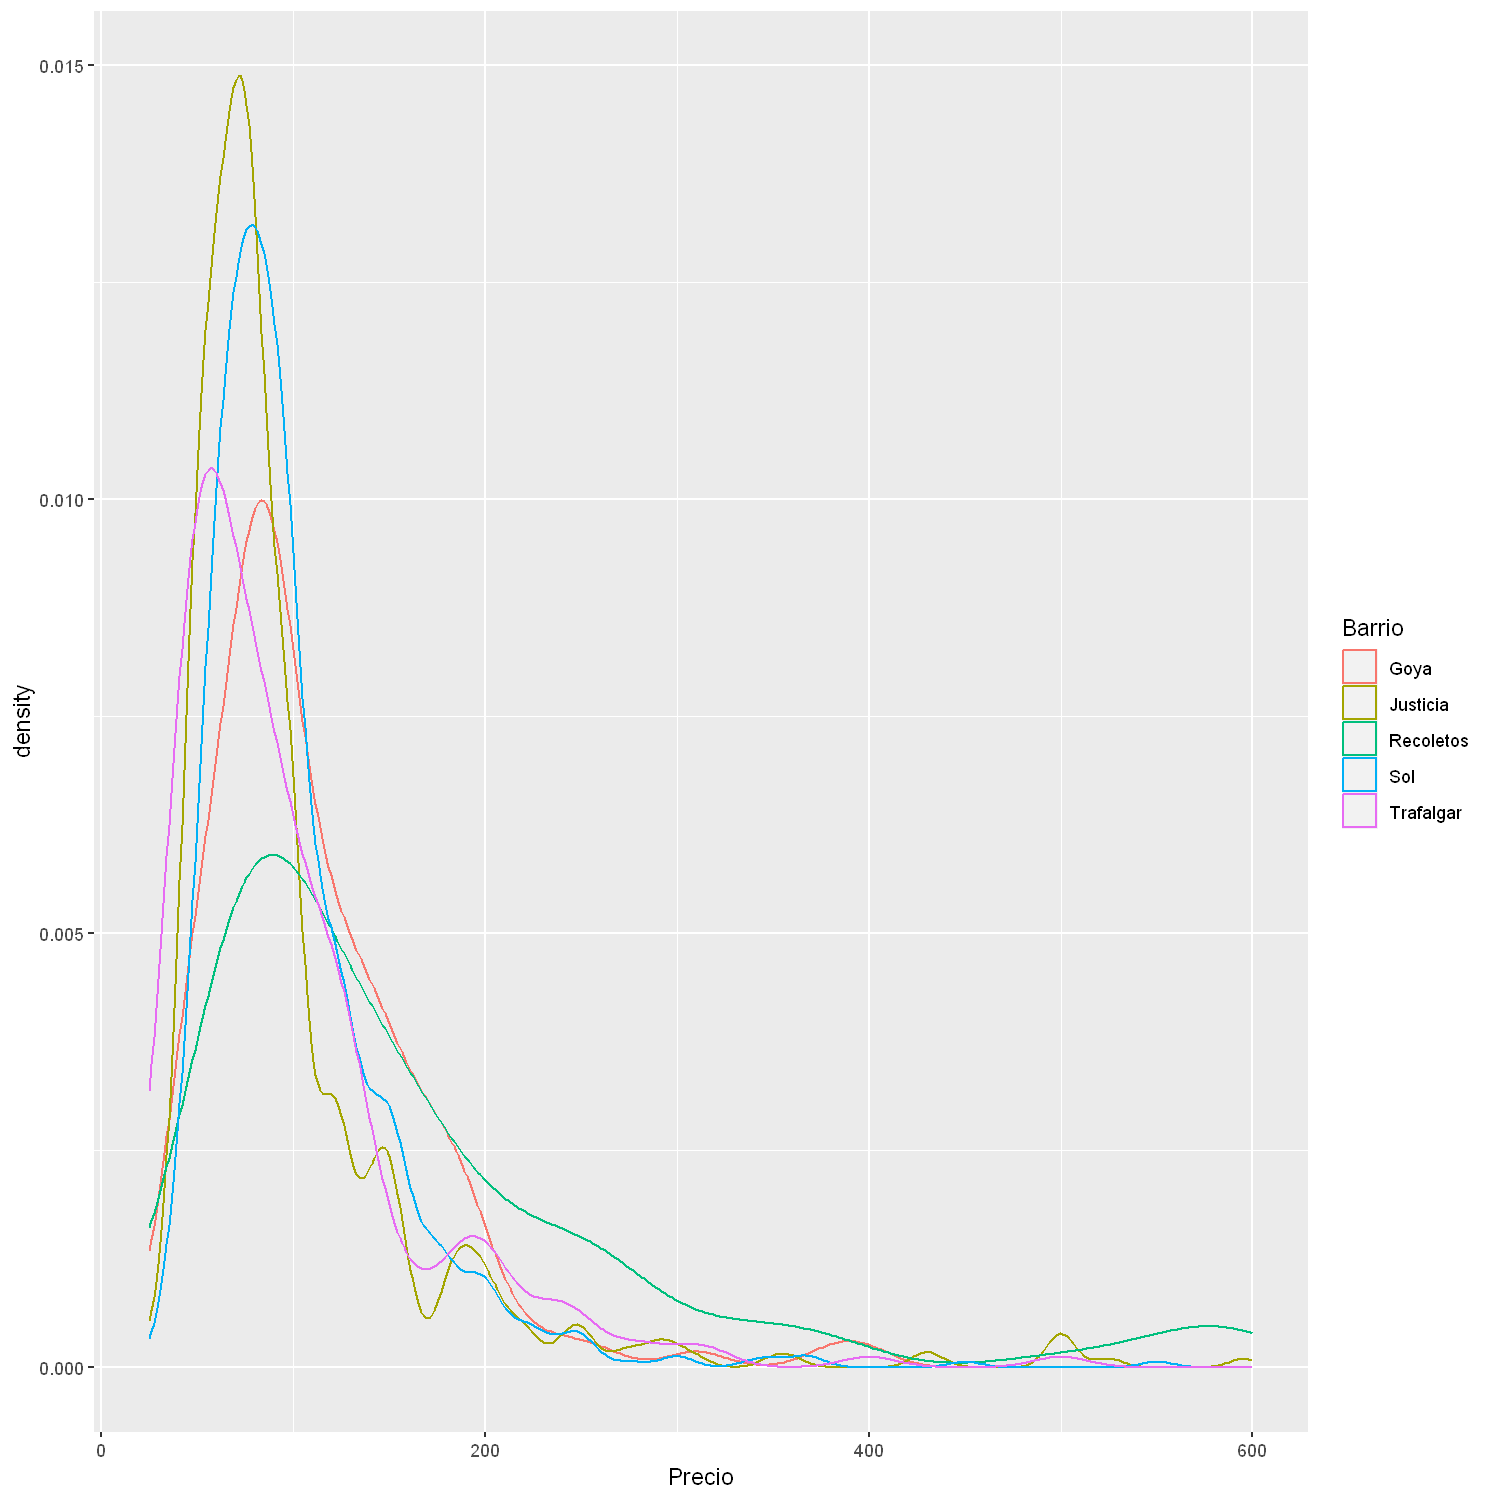

In [31]:
ggplot(airbnb_entire[airbnb_entire$Barrio %in% BarriosOrdenados100[,1],], aes(x=Precio, color=Barrio))+
geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [32]:
cat(" Tamaño medio en metros cuadrado por Barrio")
BarriosOrdenados100 <- merge(
    MetrosPorBarrio <- aggregate(MetrosCuadrados ~ Barrio
        , airbnb_entire
        , mean
        , na.rm=TRUE)
    , BarriosOrdenados100)


BarriosOrdenados100  <- BarriosOrdenados100[BarriosOrdenados100$Precio %>% order(decreasing=T), ]

BarriosOrdenados100  %>% head(5)


 Tamaño medio en metros cuadrado por Barrio

,Barrio,MetrosCuadrados,Precio,Freq
,<fct>,<dbl>,<dbl>,<int>
3,Recoletos,26.66316,161.92537,126
1,Goya,51.68504,111.33803,137
4,Sol,45.61692,100.75036,688
5,Trafalgar,29.30426,98.57848,215
2,Justicia,28.52669,98.25468,519


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

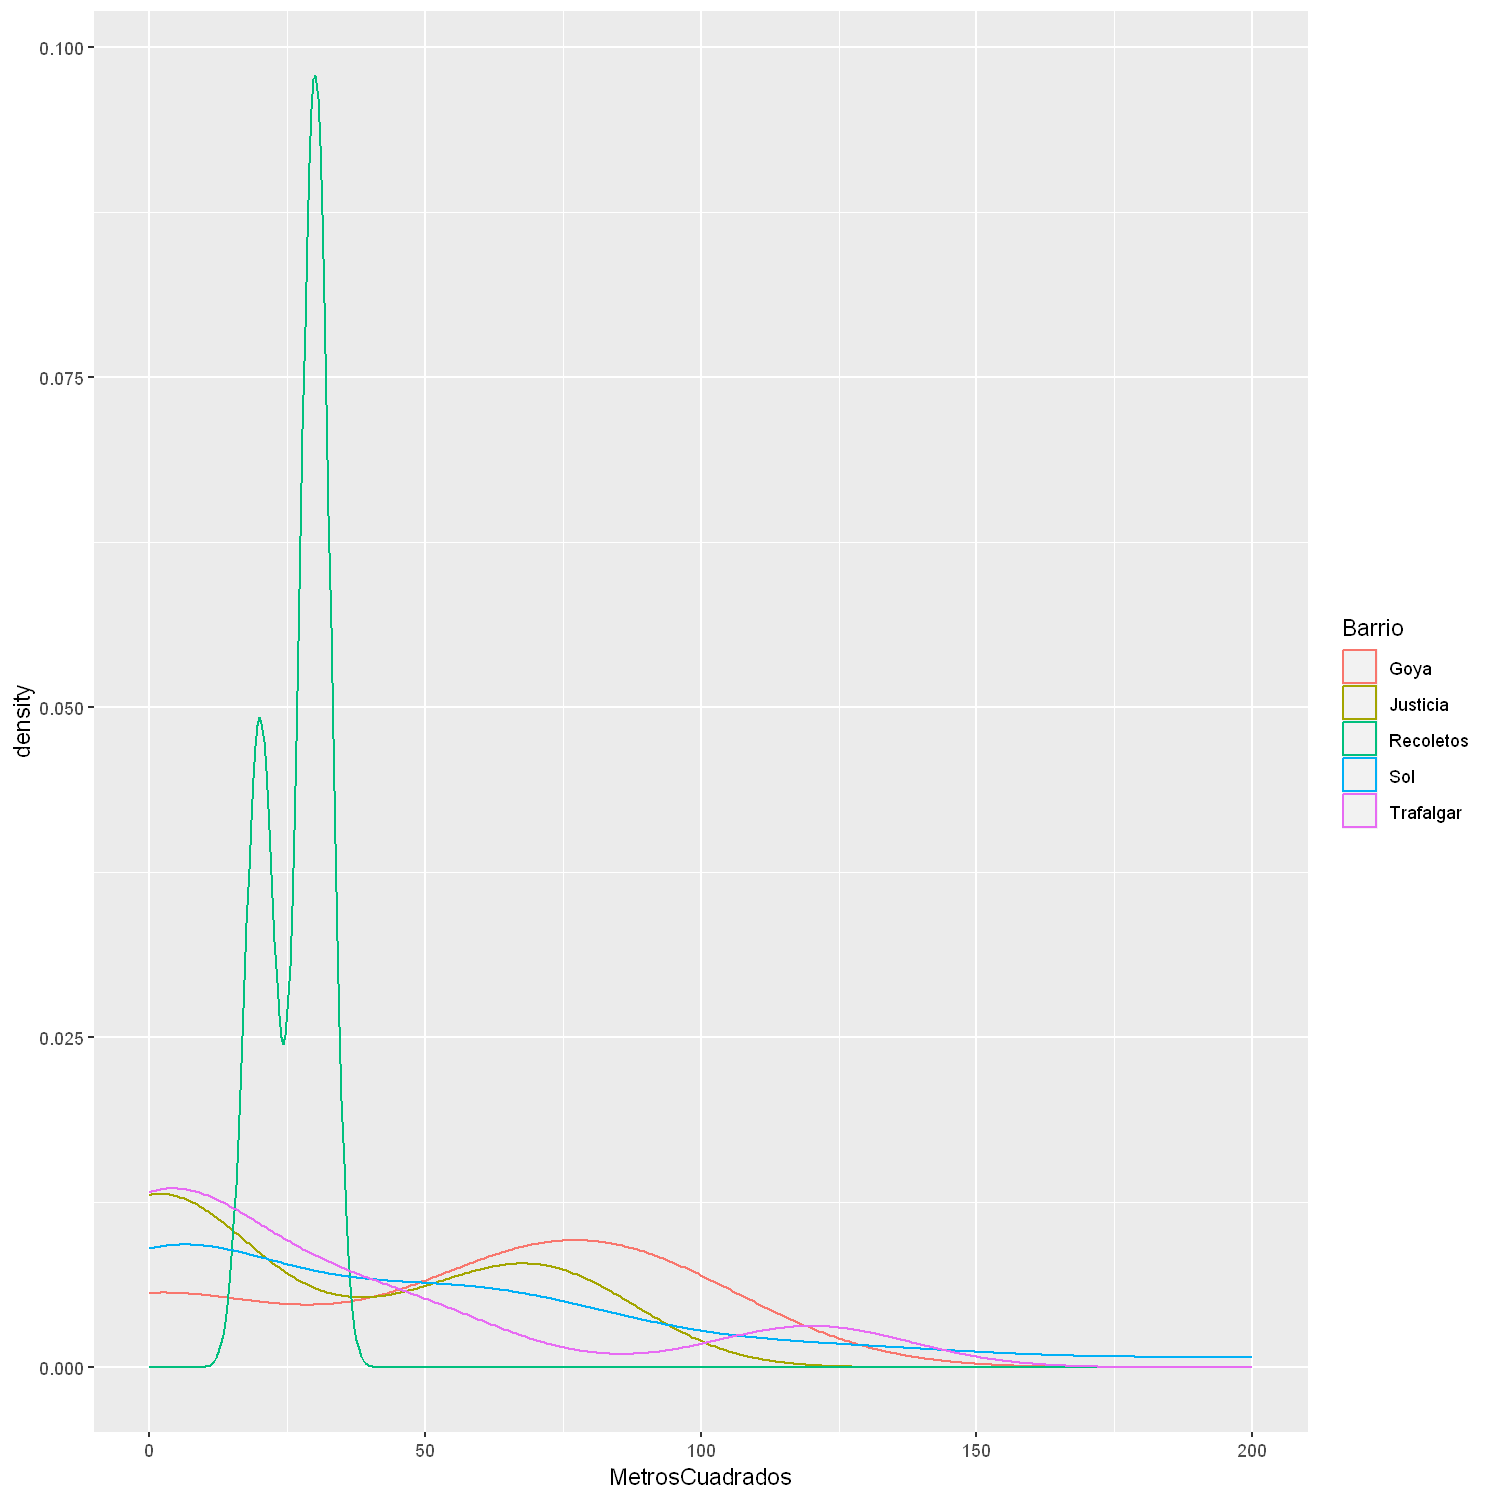

In [33]:
Barrios_Top5 <- airbnb_entire[airbnb_entire$Barrio == "Recoletos" |
                           airbnb_entire$Barrio == "Goya" |
                           airbnb_entire$Barrio == "Sol" |
                           airbnb_entire$Barrio == "Trafalgar" |
                           airbnb_entire$Barrio == "Justicia"
                           ,c("Barrio","Precio", "MetrosCuadrados")]

Barrios_Top5_ <- Barrios_Top5[!is.na(Barrios_Top5$MetrosCuadrados),]

ggplot(Barrios_Top5_, aes(x=MetrosCuadrados, color=Barrio))+geom_density()


Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [34]:

cat(" Shapiro test\n")


cat(paste(" Valor p-value para Goyya",shapiro.test(Barrios_Top5_$MetrosCuadrados[Barrios_Top5_$Barrio == "Goya"])$p.value),"\n")
cat(paste(" Valor p-value para Justicia",shapiro.test(Barrios_Top5_$MetrosCuadrados[Barrios_Top5_$Barrio == "Justicia"])$p.value),"\n")
cat(paste(" Valor p-value para Recoletos",shapiro.test(Barrios_Top5_$MetrosCuadrados[Barrios_Top5_$Barrio == "Recoletos"])$p.value),"\n")
cat(paste(" Valor p-value para Sol",shapiro.test(Barrios_Top5_$MetrosCuadrados[Barrios_Top5_$Barrio == "Sol"])$p.value),"\n")
cat(paste(" Valor p-value para Trafalgar",shapiro.test(Barrios_Top5_$MetrosCuadrados[Barrios_Top5_$Barrio == "Trafalgar"])$p.value),"\n")
cat("\n")
cat("Hay diferencias en la distribucion de los metros cuadrados por barrio, algunas tienden a ser normales otras no\n\n")
cat("Ejecuto el test de kruskal \n")

kruskal.test(MetrosCuadrados ~ Barrio, data = Barrios_Top5_)
    
cat("El p-value por encima de 0.7574 parece indicar que no son estadisticamente diferentes")


 Shapiro test
 Valor p-value para Goyya 0.519924091564745 
 Valor p-value para Justicia 0.00064192630271212 
 Valor p-value para Recoletos 0 
 Valor p-value para Sol 8.6913775134728e-07 
 Valor p-value para Trafalgar 0.0127581397426826 

Hay diferencias en la distribucion de los metros cuadrados por barrio, algunas tienden a ser normales otras no

Ejecuto el test de kruskal 



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


El p-value por encima de 0.7574 parece indicar que no son estadisticamente diferentes

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [35]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrio_sol


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534
16,28013,Sol,Condominium,Entire home/apt,6,1,2,3,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,130,100,NA
17,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,100,97,NA
18,28012,Sol,Apartment,Entire home/apt,6,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,160,95,NA
19,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Hangers,Hair dryer,translation missing: en.hosting_amenity_50",NA,49,95,NA
21,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",NA,70,88,NA
22,28005,Sol,Apartment,Entire home/apt,10,2,4,7,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Washer,Essentials",NA,210,81,NA
23,28013,Sol,Apartment,Entire home/apt,6,1,2,4,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,120,99,NA
24,28012,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,50,91,NA


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [36]:

barrio_sol_DF <- barrio_sol[
    !is.na(barrio_sol$NumBanyos) & 
    !is.na(barrio_sol$NumDormitorios) & 
    !is.na(barrio_sol$MaxOcupantes) & 
    !is.na(barrio_sol$MetrosCuadrados), ]
cat (" Matriz de Correlacion\n") 
cor(
    cbind(
        barrio_sol_DF$NumDormitorios,
        barrio_sol_DF$MetrosCuadrados,
        barrio_sol_DF$NumBanyos,
        barrio_sol_DF$MaxOcupantes
    )
)
cat("Correlacion entre Numero de Dormitorios y Metros Cuadrados: \n")
cor(barrio_sol_DF$NumDormitorios,barrio_sol_DF$MetrosCuadrados)
cat("En teoria el numero de dormitorios deberia estar relacionado de forma \\'causal'\\ con los metros Cuadrados\n
A mas dormitorios la superficie deberia ser mayor. Sim embargo se esta indicando poca correlacion entre
numero habitaciones y metros cuadrados, debe haber algun factor que este afectando a esta correlacion")

 Matriz de Correlacion


1.0000000,0.5684521,0.6873719,0.7853809
0.5684521,1.0000000,0.4820549,0.4286233
0.6873719,0.4820549,1.0000000,0.7017290
0.7853809,0.4286233,0.7017290,1.0000000


Correlacion entre Numero de Dormitorios y Metros Cuadrados: 


[1] 0.5684521

En teoria el numero de dormitorios deberia estar relacionado de forma \'causal'\ con los metros Cuadrados

A mas dormitorios la superficie deberia ser mayor. Sim embargo se esta indicando poca correlacion entre
numero habitaciones y metros cuadrados, debe haber algun factor que este afectando a esta correlacion

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


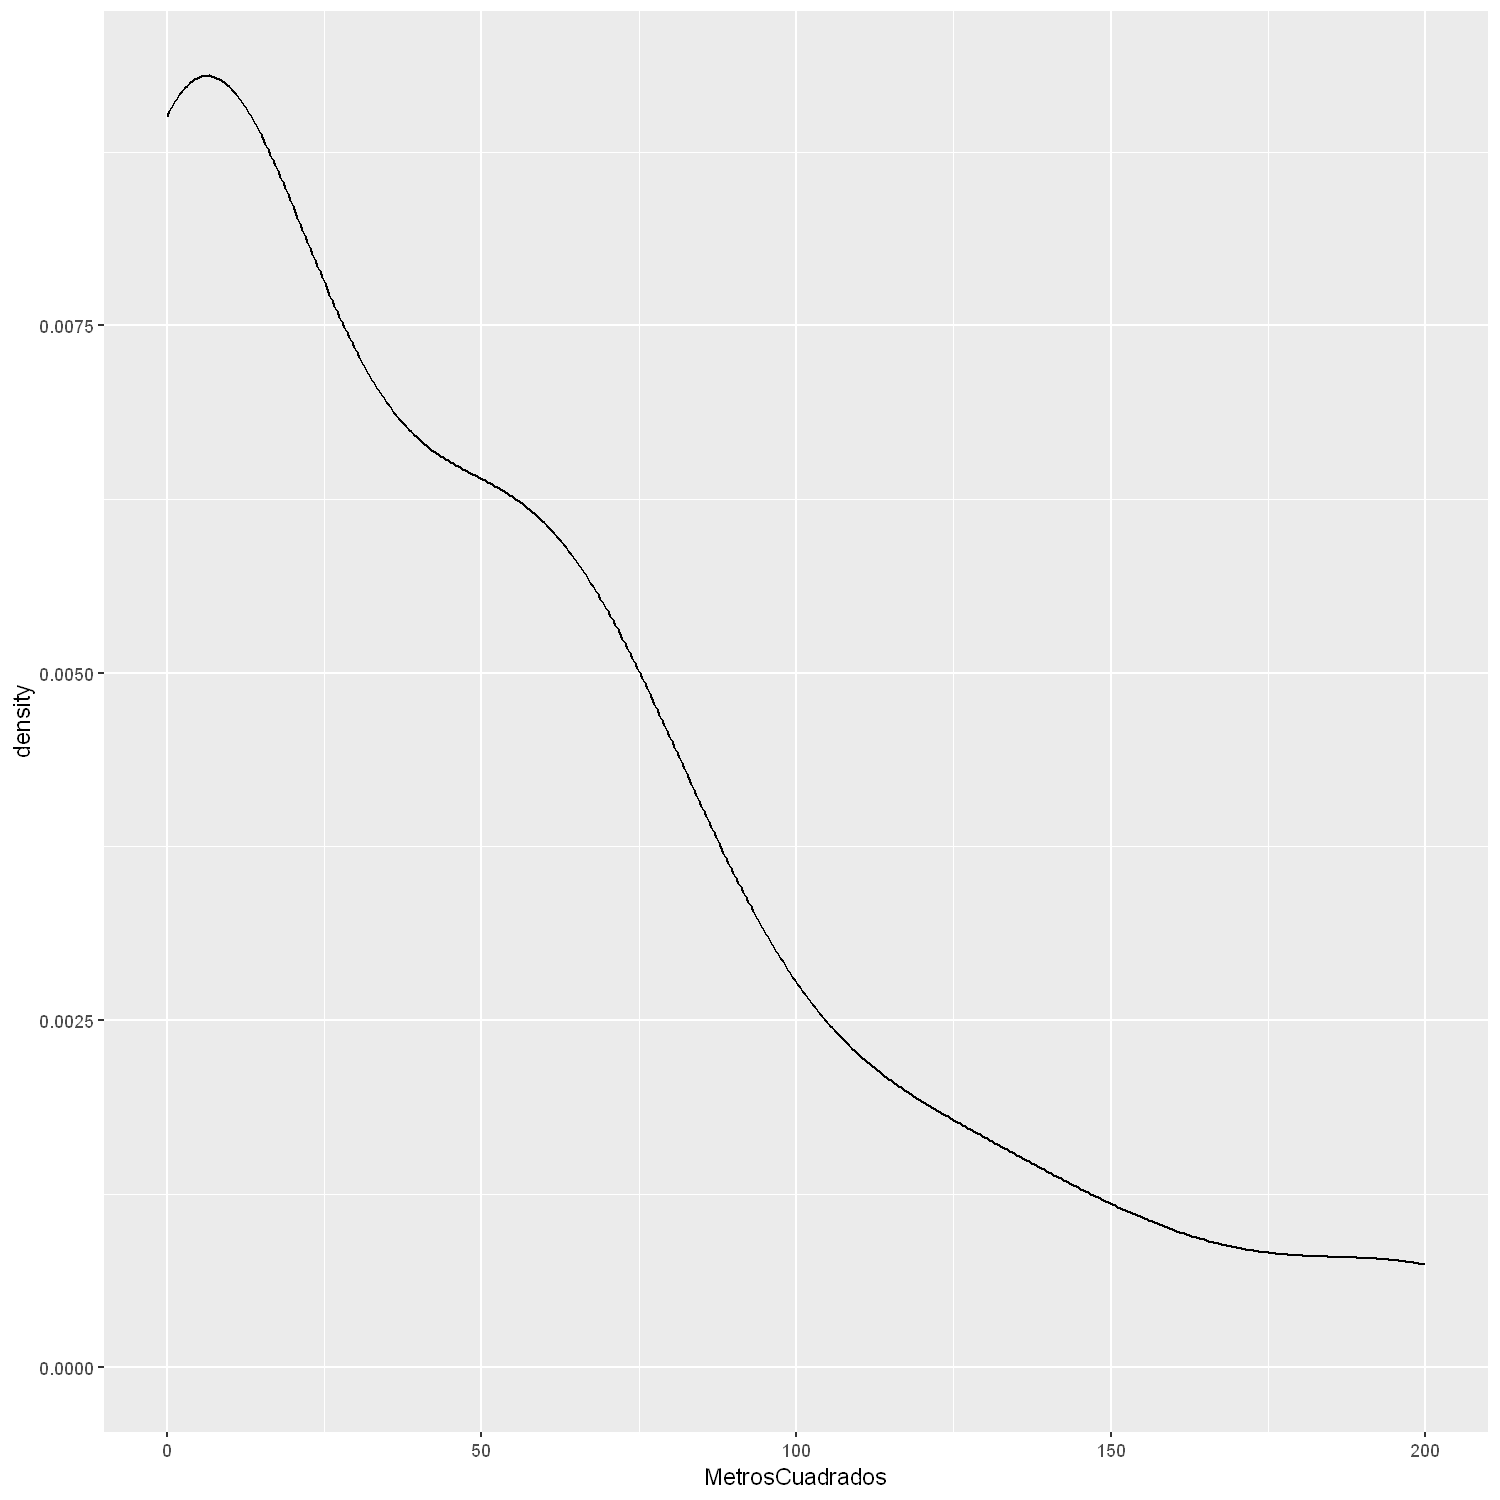

In [37]:
ggplot(barrio_sol_DF, aes(x=MetrosCuadrados)) +
  geom_density()

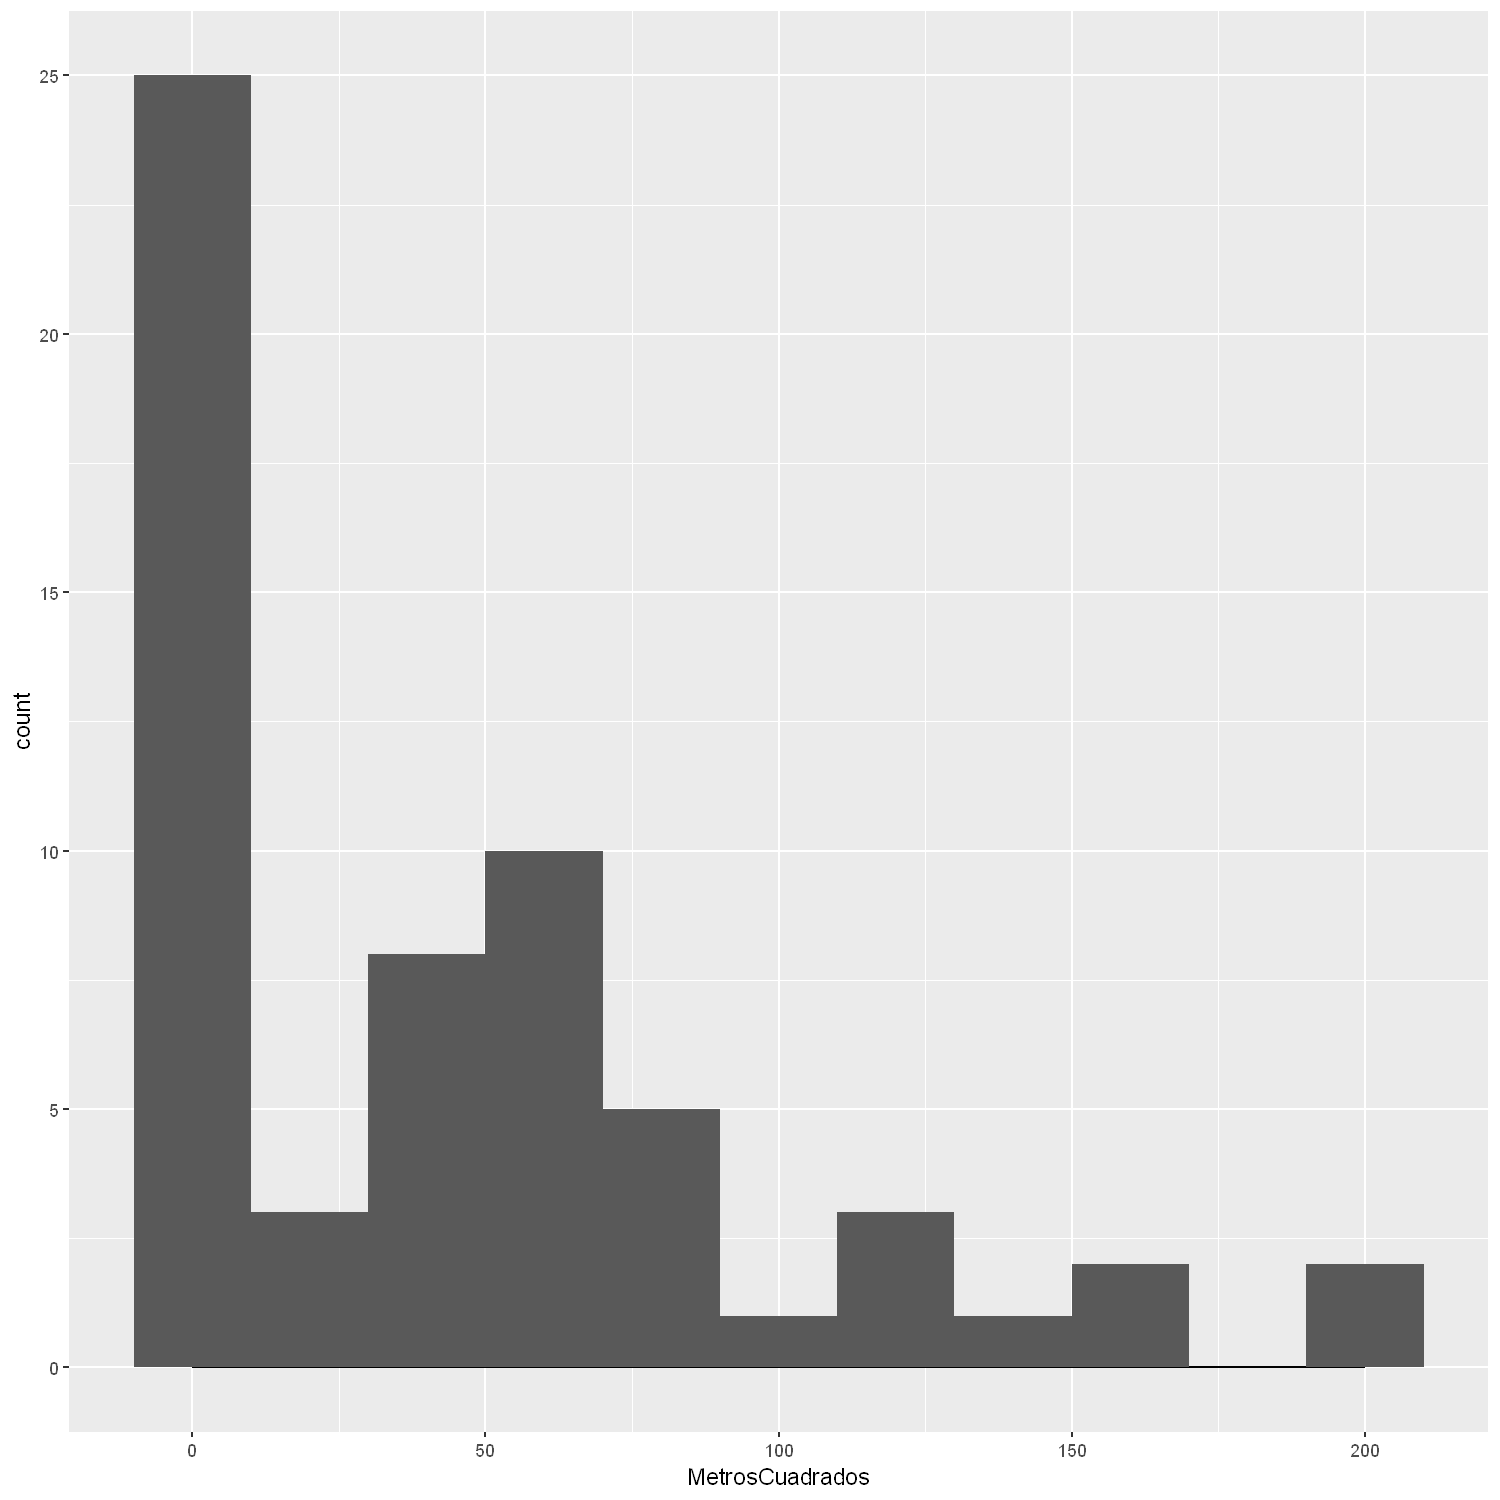

In [38]:
ggplot(barrio_sol_DF, aes(x=MetrosCuadrados)) +
  geom_density()+
geom_histogram(position="dodge",binwidth=20)

In [39]:
cat( "Se Observa q hay un alto porcentajes de registros en donde los metros cuadrados su valor es 0 \n
posiblemente la correlacion se ha visto afectada por este hecho.Filtraremos los apartamentos por aquellos\n
con metros cuadrados superior a 20")

Se Observa q hay un alto porcentajes de registros en donde los metros cuadrados su valor es 0 

posiblemente la correlacion se ha visto afectada por este hecho.Filtraremos los apartamentos por aquellos

con metros cuadrados superior a 20

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [40]:
Filtro_Sol <- subset(barrio_sol_DF,barrio_sol_DF$MetrosCuadrados > 20)
cat("Ahora la correlacion entre Metros cuadrados y numero dormitorios es: \n")
cor(Filtro_Sol$MetrosCuadrados,Filtro_Sol$NumDormitorios)
cat("Matriz de Correlacion;\n ")

cor(
    cbind(
        Filtro_Sol$MetrosCuadrados,
        Filtro_Sol$NumDormitorios,
        Filtro_Sol$NumBanyos,
        Filtro_Sol$MaxOcupantes
    )
)

Ahora la correlacion entre Metros cuadrados y numero dormitorios es: 


[1] 0.8290754

Matriz de Correlacion;
 

1.0000000,0.8290754,0.6040653,0.6909450
0.8290754,1.0000000,0.7245916,0.7854671
0.6040653,0.7245916,1.0000000,0.8604387
0.6909450,0.7854671,0.8604387,1.0000000


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [42]:
modelo<-lm(data=Filtro_Sol, formula = Precio ~ NumDormitorios + MetrosCuadrados + NumBanyos + MaxOcupantes + NumCamas)
summary(modelo)
cor(
    
    cbind(
        Filtro_Sol$Precio,
        Filtro_Sol$MetrosCuadrados,
        Filtro_Sol$NumDormitorios
        
        ))

cat("la variable mas fiable es el numero de Dormitorios")



Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados + NumBanyos + 
    MaxOcupantes + NumCamas, data = Filtro_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.535 -13.427  -5.189  20.287  68.319 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      27.3076    15.1806   1.799  0.08323 . 
NumDormitorios   32.7612     9.8158   3.338  0.00247 **
MetrosCuadrados   0.1645     0.2242   0.734  0.46942   
NumBanyos        -0.8746    15.3765  -0.057  0.95506   
MaxOcupantes      6.2385     6.5005   0.960  0.34572   
NumCamas         -5.5939     6.1981  -0.903  0.37477   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.34 on 27 degrees of freedom
Multiple R-squared:  0.758,	Adjusted R-squared:  0.7132 
F-statistic: 16.91 on 5 and 27 DF,  p-value: 1.397e-07


1.0000000,0.7605236,0.8594089
0.7605236,1.0000000,0.8290754
0.8594089,0.8290754,1.0000000


la variable mas fiable es el numero de Dormitorios

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [43]:
Precio_Metro <- lm(data=Filtro_Sol, formula = Precio ~ MetrosCuadrados)
summary(Precio_Metro)
cat("Aumento del precio por metro cuadrado: ", Precio_Metro$coefficients[2])
confint(Precio_Metro)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = Filtro_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.388 -21.792  -0.115  10.642 121.693 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      29.5861    14.1142   2.096   0.0443 *  
MetrosCuadrados   0.9912     0.1520   6.521 2.81e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.83 on 31 degrees of freedom
Multiple R-squared:  0.5784,	Adjusted R-squared:  0.5648 
F-statistic: 42.53 on 1 and 31 DF,  p-value: 2.809e-07


Aumento del precio por metro cuadrado:  0.9912161

,2.5 %,97.5 %
(Intercept),0.7999527,58.37229
MetrosCuadrados,0.6812218,1.30121


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [44]:
modeloPrecio_Alquiler_Habitacion <- lm(data=Filtro_Sol, formula = Precio ~ NumDormitorios)
summary(modeloPrecio_Alquiler_Habitacion)
cat ("Se incrementa en : ",modeloPrecio_Alquiler_Habitacion$coefficients[2])
confint(modeloPrecio_Alquiler_Habitacion)


Call:
lm(formula = Precio ~ NumDormitorios, data = Filtro_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.214 -17.652  -5.652  18.457  61.786 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      43.762      8.919   4.907 2.80e-05 ***
NumDormitorios   38.890      4.156   9.359 1.52e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.37 on 31 degrees of freedom
Multiple R-squared:  0.7386,	Adjusted R-squared:  0.7302 
F-statistic: 87.58 on 1 and 31 DF,  p-value: 1.523e-10


Se incrementa en :  38.89043

,2.5 %,97.5 %
(Intercept),25.57224,61.95116
NumDormitorios,30.41513,47.36572


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [45]:
cuenta_total_apartamentos <- nrow(barrio_sol)
cuenta_total_3 <- barrio_sol[barrio_sol$NumDormitorios ==3,]
cuenta_total_apartamentos_3Habitaciones <- nrow(cuenta_total_3)


cat("Probabilidad de : ", cuenta_total_apartamentos_3Habitaciones/cuenta_total_apartamentos)
cat(" \nExiste un 7% de probabilidad de encontrar en el Barrio de Sol un apartamento con 3 dormitorios")

Probabilidad de :  0.07845934 
Existe un 7% de probabilidad de encontrar en el Barrio de Sol un apartamento con 3 dormitorios

In [46]:
binom.test(cuenta_total_apartamentos_3Habitaciones,cuenta_total_apartamentos,1/55)

cat("el intervalo de confianza esta entre 0.0596506 y  0.1009033 ")


	Exact binomial test

data:  cuenta_total_apartamentos_3Habitaciones and cuenta_total_apartamentos
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.01818182
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 


el intervalo de confianza esta entre 0.0596506 y  0.1009033 